# Correlation Analysis

In [64]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
from scipy.sparse import issparse
import scanpy as sc
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
print(ad.__version__)

0.11.4


In [65]:
# Load young and old data
# cell_type = "CD8-positive, alpha-beta cytotoxic T cell"
# cell_type = "erythrocyte"
cell_type = "regulatory T cell"
young_path = "subsets/{}_young_donors.h5ad".format(cell_type)
middle_path = "subsets/{}_middle_donors.h5ad".format(cell_type)
old_path = "subsets/{}_old_donors.h5ad".format(cell_type)
adata_young = ad.read_h5ad(young_path)
adata_middle = ad.read_h5ad(middle_path)
adata_old = ad.read_h5ad(old_path)
print(adata_young)
print(adata_middle)
print(adata_old)

AnnData object with n_obs × n_vars = 96 × 603
    obs: 'reference_genome', 'gene_annotation_version', 'alignment_software', 'intronic_reads_counted', 'library_id', 'assay_ontology_term_id', 'sequenced_fragment', 'cell_number_loaded', 'institute', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'sample_id', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_collection_method', 'donor_BMI_at_collection', 'tissue_type', 'suspension_derivation_process', 'suspension_enriched_cell_types', 'cell_viability_percentage', 'suspension_uuid', 'suspension_type', 'self_reported_ethnicity_ontology_term_id', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'Country', 'nCount_RNA', 'nFeature_RNA', 'TCR_VDJdb', 'TCRa_V_gene', 'TCRa_D_gene', 'TCRa_J_gene', 'TCRa_C_gene', 'TCRb_V_gene', 'TCRb_D_gene', 'TCRb_J_gene', 'TCRb_C_gene', 'TCR_Clonality', 'TCR_Clone_ID', 'BC

In [66]:
# Check that every gene is expressed at least once in each dataset in .X
young_check = np.sum(adata_young.X != 0, axis=0)
middle_check = np.sum(adata_middle.X != 0, axis=0)
old_check = np.sum(adata_old.X != 0, axis=0)

# Check that every number in young_check is greater than 0
if np.all(young_check > 0):
    print("All genes expressed at least once in young dataset")

if np.all(middle_check > 0):
    print("All genes expressed at least once in middle dataset")

# Check that every number in old_check is greater than 0
if np.all(old_check > 0):
    print("All genes expressed at least once in old dataset")

All genes expressed at least once in young dataset
All genes expressed at least once in middle dataset
All genes expressed at least once in old dataset


In [67]:
# Get the expression matrix (cells x genes)
if issparse(adata_young.X):
    expr_matrix = adata_young.X.toarray()  # Convert sparse to dense if needed
else:
    expr_matrix = adata_young.X

# Transpose to genes x cells for correlation calculation
expr_matrix = expr_matrix.T

# Calculate correlation matrix (Pearson)
corr_matrix = np.corrcoef(expr_matrix)

# Convert to DataFrame for easier handling
gene_names = adata_young.var_names
corr_df_young = pd.DataFrame(corr_matrix, index=gene_names, columns=gene_names)

In [68]:
# # Get the expression matrix (cells x genes)
# if issparse(adata_young.X):
#     expr_matrix = adata_young.X.toarray()  # Convert sparse to dense if needed
# else:
#     expr_matrix = adata_young.X

# # Transpose to genes x cells for correlation calculation
# expr_matrix = expr_matrix.T

# # Get gene names
# gene_names = adata_young.var_names
# n_genes = len(gene_names)

# # Initialize correlation and p-value matrices
# corr_matrix = np.zeros((n_genes, n_genes))
# p_matrix = np.zeros((n_genes, n_genes))

# # Calculate correlation and p-value for each gene pair
# for i in range(n_genes):
#     for j in range(i, n_genes):  # Take advantage of symmetry
#         corr, p_val = pearsonr(expr_matrix[i], expr_matrix[j])
#         corr_matrix[i, j] = corr
#         corr_matrix[j, i] = corr  # Symmetric
#         p_matrix[i, j] = p_val
#         p_matrix[j, i] = p_val  # Symmetric

# # Convert to DataFrames
# corr_df_young = pd.DataFrame(corr_matrix, index=gene_names, columns=gene_names)
# p_value_df_young = pd.DataFrame(p_matrix, index=gene_names, columns=gene_names)

# # Print the p-value DataFrame
# print(corr_df_young)
# print(p_value_df_young)

In [69]:
# Print the diagonal of the correlation matrix and check for NaN values
print("Diagonal of the correlation matrix (should be 1):")
print(corr_df_young.values.diagonal())
print("Number of NaN values in the correlation matrix:")
print(np.isnan(corr_df_young.values).sum())

Diagonal of the correlation matrix (should be 1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 

In [70]:
# Print the first few rows of the correlation matrix
print("First few rows of the correlation matrix:")
print(corr_df_young.head())

# Plot the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_df_young, cmap='coolwarm', center=0, square=True, cbar_kws={"shrink": .8})
# plt.title("Correlation Matrix of Gene Expression")
# plt.xlabel("Genes")
# plt.ylabel("Genes")
# plt.show()

First few rows of the correlation matrix:
                 ENSG00000116251  ENSG00000116288  ENSG00000074800  \
ENSG00000116251         1.000000         0.113861        -0.058863   
ENSG00000116288         0.113861         1.000000        -0.152596   
ENSG00000074800        -0.058863        -0.152596         1.000000   
ENSG00000028137        -0.131169        -0.029643         0.209387   
ENSG00000077549        -0.315209         0.074674         0.268946   

                 ENSG00000028137  ENSG00000077549  ENSG00000127483  \
ENSG00000116251        -0.131169        -0.315209        -0.231915   
ENSG00000116288        -0.029643         0.074674        -0.234893   
ENSG00000074800         0.209387         0.268946         0.139163   
ENSG00000028137         1.000000         0.077124         0.331796   
ENSG00000077549         0.077124         1.000000         0.196291   

                 ENSG00000070831  ENSG00000142676  ENSG00000117602  \
ENSG00000116251        -0.538402         0.829

In [71]:
# Find top correlated genes for a specific gene of interest
target_gene = "ENSG00000090104"
if target_gene in corr_df_young.columns:
    target_correlations = corr_df_young[target_gene].sort_values(ascending=False)
    print(f"Top genes correlated with {target_gene}:")
    print(target_correlations.head(110))
else:
    print(f"{target_gene} not found in the dataset")

Top genes correlated with ENSG00000090104:
ENSG00000090104    1.000000
ENSG00000118503    0.935168
ENSG00000153234    0.914596
ENSG00000110848    0.904589
ENSG00000121966    0.895850
                     ...   
ENSG00000165527    0.453448
ENSG00000198899    0.451734
ENSG00000133226    0.449447
ENSG00000163346    0.440517
ENSG00000204525    0.429903
Name: ENSG00000090104, Length: 110, dtype: float64


In [72]:
# Get the expression matrix (cells x genes)
if issparse(adata_middle.X):
    expr_matrix = adata_middle.X.toarray()  # Convert sparse to dense if needed
else:
    expr_matrix = adata_middle.X

# Transpose to genes x cells for correlation calculation
expr_matrix = expr_matrix.T

# Calculate correlation matrix (Pearson)
corr_matrix = np.corrcoef(expr_matrix)

# Convert to DataFrame for easier handling
gene_names = adata_middle.var_names
corr_df_middle = pd.DataFrame(corr_matrix, index=gene_names, columns=gene_names)

In [73]:
# Print the diagonal of the correlation matrix and check for NaN values
print("Diagonal of the correlation matrix (should be 1):")
print(corr_df_middle.values.diagonal())
print("Number of NaN values in the correlation matrix:")
print(np.isnan(corr_df_middle.values).sum())

Diagonal of the correlation matrix (should be 1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 

In [74]:
# Print the first few rows of the correlation matrix
print("First few rows of the correlation matrix:")
print(corr_df_middle.head())

First few rows of the correlation matrix:
                 ENSG00000116251  ENSG00000116288  ENSG00000074800  \
ENSG00000116251         1.000000         0.108960        -0.124752   
ENSG00000116288         0.108960         1.000000         0.202145   
ENSG00000074800        -0.124752         0.202145         1.000000   
ENSG00000028137        -0.433601         0.046768         0.247148   
ENSG00000077549        -0.319427         0.369617         0.474597   

                 ENSG00000028137  ENSG00000077549  ENSG00000127483  \
ENSG00000116251        -0.433601        -0.319427        -0.321397   
ENSG00000116288         0.046768         0.369617        -0.051739   
ENSG00000074800         0.247148         0.474597         0.177514   
ENSG00000028137         1.000000         0.380713         0.316352   
ENSG00000077549         0.380713         1.000000         0.111332   

                 ENSG00000070831  ENSG00000142676  ENSG00000117602  \
ENSG00000116251        -0.295655         0.781

In [75]:
# Find top correlated genes for a specific gene of interest
target_gene = "ENSG00000166710"
if target_gene in corr_df_middle.columns:
    target_correlations = corr_df_middle[target_gene].sort_values(ascending=False)
    print(f"Top genes correlated with {target_gene}:")
    print(target_correlations.head(10))
else:
    print(f"{target_gene} not found in the dataset")

Top genes correlated with ENSG00000166710:
ENSG00000166710    1.000000
ENSG00000196154    0.686940
ENSG00000142669    0.671250
ENSG00000034510    0.663938
ENSG00000172757    0.634476
ENSG00000008517    0.618272
ENSG00000108518    0.608961
ENSG00000169442    0.606691
ENSG00000075624    0.597324
ENSG00000111348    0.582181
Name: ENSG00000166710, dtype: float64


In [76]:
# Get the expression matrix for old donors
if issparse(adata_old.X):
    expr_matrix_old = adata_old.X.toarray()  # Convert sparse to dense if needed
else:
    expr_matrix_old = adata_old.X

# Transpose to genes x cells for correlation calculation
expr_matrix_old = expr_matrix_old.T

# Calculate correlation matrix (Pearson) for old donors
corr_matrix_old = np.corrcoef(expr_matrix_old)

# Convert to DataFrame for easier handling
corr_df_old = pd.DataFrame(corr_matrix_old, index=gene_names, columns=gene_names)

In [77]:
# Print the diagonal of the correlation matrix and check for NaN values
print("Diagonal of the correlation matrix (should be 1):")
print(corr_df_old.values.diagonal())
print("Number of NaN values in the correlation matrix:")
print(np.isnan(corr_df_old.values).sum())

Diagonal of the correlation matrix (should be 1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 

In [78]:
# Find top correlated genes for a specific gene of interest in old donors
if target_gene in corr_df_old.columns:
    target_correlations_old = corr_df_old[target_gene].sort_values(ascending=False)
    print(f"Top genes correlated with {target_gene} in old donors:")
    print(target_correlations_old.head(10))
else:
    print(f"{target_gene} not found in the old donor dataset")

Top genes correlated with ENSG00000166710 in old donors:
ENSG00000166710    1.000000
ENSG00000142669    0.747323
ENSG00000140264    0.730646
ENSG00000130429    0.697992
ENSG00000196154    0.695523
ENSG00000075624    0.693654
ENSG00000108518    0.685888
ENSG00000008517    0.682661
ENSG00000111229    0.676935
ENSG00000092841    0.667502
Name: ENSG00000166710, dtype: float64


In [79]:
# Create a difference correlation matrix
def create_difference_correlation_matrix(corr_df1, corr_df2):
    """
    Create a difference correlation matrix between two correlation DataFrames.
    """
    # Ensure both DataFrames have the same index and columns
    assert corr_df1.shape == corr_df2.shape, "DataFrames must have the same shape"
    
    # Calculate the difference
    diff_corr_matrix = corr_df1 - corr_df2
    
    return diff_corr_matrix

# Create difference correlation matrices
diff_corr_young_middle = create_difference_correlation_matrix(corr_df_young, corr_df_middle)
diff_corr_young_old = create_difference_correlation_matrix(corr_df_young, corr_df_old)
diff_corr_middle_old = create_difference_correlation_matrix(corr_df_middle, corr_df_old)

# Assert that all difference correlation matrices have zero diagonal
assert np.all(diff_corr_young_middle.values.diagonal() <= 1e-10), "Diagonal of difference correlation matrix should be zero"

In [80]:
# Find the top 10 genes pairs with the largest absolute difference in correlation
top_diff_genes = diff_corr_young_old.abs().unstack().sort_values(ascending=False)


In [81]:
print("Top 10 gene pairs with the largest absolute difference in correlation:")
print(top_diff_genes.head(10))

Top 10 gene pairs with the largest absolute difference in correlation:
ENSG00000197111  ENSG00000090104    0.956632
ENSG00000090104  ENSG00000197111    0.956632
ENSG00000153234  ENSG00000197111    0.928456
ENSG00000197111  ENSG00000153234    0.928456
ENSG00000122566  ENSG00000100201    0.926104
ENSG00000100201  ENSG00000122566    0.926104
ENSG00000197111  ENSG00000118503    0.909383
ENSG00000118503  ENSG00000197111    0.909383
ENSG00000197111  ENSG00000272888    0.900825
ENSG00000272888  ENSG00000197111    0.900825
dtype: float64


In [82]:
# Find the correlation between gene and gene2 in the difference correlation matrix
gene = "ENSG00000197111"
gene2 = "ENSG00000090104"
if gene in diff_corr_young_old.columns and gene2 in diff_corr_young_old.columns:
    correlation = diff_corr_young_old.loc[gene, gene2]
    print(f"Correlation between {gene} and {gene2} in the difference correlation matrix: {correlation}")

# Find the correlation between ENSG00000197111 and ENSG00000179094 in young donors
if gene in corr_df_young.columns and gene2 in corr_df_young.columns:
    correlation_young = corr_df_young.loc[gene, gene2]
    print(f"Correlation between {gene} and {gene2} in young donors: {correlation_young}")

# Find the correlation between ENSG00000197111 and ENSG00000179094 in old donors
if gene in corr_df_old.columns and gene2 in corr_df_old.columns:
    correlation_old = corr_df_old.loc[gene, gene2]
    print(f"Correlation between {gene} and {gene2} in old donors: {correlation_old}")



# Create a excel file with the same information for the top 10 gene pairs 
# The columns would be gene1, gene2, correlation difference, correlation in young, correlation in middle, correlation in old
top_diff_genes_df = pd.DataFrame(top_diff_genes, columns=["Correlation Difference"])
top_diff_genes_df.reset_index(inplace=True)
top_diff_genes_df.columns = ["Gene1", "Gene2", "Correlation Difference"]

# Add correlation values from young, middle, and old datasets
top_diff_genes_df["Correlation Young"] = top_diff_genes_df.apply(lambda x: corr_df_young.loc[x["Gene1"], x["Gene2"]], axis=1)
top_diff_genes_df["Correlation Middle"] = top_diff_genes_df.apply(lambda x: corr_df_middle.loc[x["Gene1"], x["Gene2"]], axis=1)
top_diff_genes_df["Correlation Old"] = top_diff_genes_df.apply(lambda x: corr_df_old.loc[x["Gene1"], x["Gene2"]], axis=1)
# Save to Excel
path = "results/{}_top_diff_genes.xlsx".format(cell_type)
top_diff_genes_df.to_excel(path, index=False)




Correlation between ENSG00000197111 and ENSG00000090104 in the difference correlation matrix: -0.9566323392325988
Correlation between ENSG00000197111 and ENSG00000090104 in young donors: -0.4552206535649174
Correlation between ENSG00000197111 and ENSG00000090104 in old donors: 0.5014116856676815


In [83]:
# Calculate the z value for the correlation coefficients of the two datasets
def fisher_z_transform(r):
    """Fisher Z transformation."""
    return 0.5 * np.log((1 + r) / (1 - r))

n1 = adata_young.shape[0]  # Number of donors in young dataset
n2 = adata_old.shape[0]  # Number of donors in old dataset
SE_diff = np.sqrt((1 / (n1 - 3)) + (1 / (n2 - 3)))  # Standard error of the difference
print("Standard error of the difference:", SE_diff)
gene_names = adata_young.var_names
z_diff = fisher_z_transform(corr_df_young) - fisher_z_transform(corr_df_old)
# Remove all the infinite values
# Count the numner of infinite values
num_inf = np.isinf(z_diff).sum()
print("Number of infinite values in z_diff:", num_inf)
# Count the number of NaN values
num_nan = np.isnan(z_diff).sum()
print("Number of NaN values in z_diff:", num_nan)

# Zet all the diagonal values to 0
for i in range(z_diff.shape[0]):
    z_diff.values[i, i] = 0


# Count the number of NaN values
num_nan = np.isnan(z_diff).sum().sum()
print("Number of NaN values in z_diff:", num_nan)
# Count the number of infinite values
num_inf = np.isinf(z_diff).sum().sum()
print("Number of infinite values in z_diff:", num_inf)

# Turn the z_diff into a DataFrame
z_diff = pd.DataFrame(z_diff, index=gene_names, columns=gene_names)


z_diff /= SE_diff  # Z-score for the difference in correlations

# Print the shape of the z_diff matrix
print("Shape of the z_diff matrix:")
print(z_diff.shape)

Standard error of the difference: 0.173157319807198
Number of infinite values in z_diff: ENSG00000116251    0
ENSG00000116288    0
ENSG00000074800    0
ENSG00000028137    0
ENSG00000077549    0
                  ..
ENSG00000212907    1
ENSG00000198886    0
ENSG00000198786    0
ENSG00000198695    0
ENSG00000198727    0
Length: 603, dtype: int64
Number of NaN values in z_diff: ENSG00000116251    1
ENSG00000116288    1
ENSG00000074800    1
ENSG00000028137    1
ENSG00000077549    1
                  ..
ENSG00000212907    0
ENSG00000198886    1
ENSG00000198786    1
ENSG00000198695    1
ENSG00000198727    1
Length: 603, dtype: int64
Number of NaN values in z_diff: 0
Number of infinite values in z_diff: 0
Shape of the z_diff matrix:
(603, 603)


In [84]:
# Find the top 10 genes with the largest absolute z-scores
top_genes = z_diff.abs().unstack().sort_values(ascending=False)

print("Top 10 genes with the largest absolute z-scores:")
print(top_genes.head(10))

Top 10 genes with the largest absolute z-scores:
ENSG00000100201  ENSG00000122566    6.526959
ENSG00000122566  ENSG00000100201    6.526959
ENSG00000090104  ENSG00000197111    6.020284
ENSG00000197111  ENSG00000090104    6.020284
ENSG00000177954  ENSG00000179144    5.903851
ENSG00000179144  ENSG00000177954    5.903851
ENSG00000197111  ENSG00000272888    5.852114
ENSG00000272888  ENSG00000197111    5.852114
ENSG00000197111  ENSG00000153234    5.809418
ENSG00000153234  ENSG00000197111    5.809418
dtype: float64


In [85]:
# We define a significant difference as |Z| > 2.576 or p < 0.01
# This corresponds to a 99% confidence interval for a two-tailed test
significant_diff = 2.576

# We want to create a network of genes with a significant difference in correlation between young and old donors
# So we want to make a list of all the genes and for every gene we want a list with all the genes that are significantly different
# in correlation with that gene so for example if gene A has a significant difference in correlation with gene B and gene C
# we want to add B and C to the list of gene A [A: [B, C]]
# We will use a dictionary to store the results
significant_diff_dict = {}
for gene in gene_names:
    # Get the differences in correlation for the current gene
    diff_for_gene = z_diff[gene]
    
    # Find genes with significant differences
    significant_genes = diff_for_gene[diff_for_gene.abs() > significant_diff].index.tolist()
    
    # Store the results in the dictionary
    significant_diff_dict[gene] = significant_genes

In [86]:
# Plot the genes with the most significant differences
# We will plot the top 10 genes with the most significant differences in the dictionary
top_genes = sorted(significant_diff_dict.items(), key=lambda x: len(x[1]), reverse=True)


In [87]:
print("Top 10 gene pairs with the most amount of difference in correlation:")
top_genes_replace_list_with_length = {}
for gene, diff_genes in top_genes:
    top_genes_replace_list_with_length[gene] = len(diff_genes)


for gene, diff_genes in top_genes[:12]:
    print(f"{gene}: {len(diff_genes)}")

# Plot the top 10 genes with the least significant differences in the dictionary
print("Top 10 gene pairs with the least amount of differences in correlation:")
for gene, diff_genes in top_genes[-10:]:
    print(f"{gene}: {len(diff_genes)}")


# Count the total number of connections in the network
total_connections = sum(len(diff_genes) for diff_genes in significant_diff_dict.values())

# Count the total number of connections in the network for the top 120 genes
total_connections_top_120 = 0
for gene, diff_genes in top_genes[:120]:
    total_connections_top_120 += len(diff_genes)

print("Total number of connections in the network:", total_connections)
print("Total number of connections in the network for the top 120 genes:", total_connections_top_120)

# Print if the pareto principle applies
if total_connections_top_120 / total_connections > 0.8:
    print("The pareto principle applies: ", total_connections_top_120 / total_connections)
else:
    print("The pareto principle does not apply: ", total_connections_top_120 / total_connections)




# Write the total_connections to a excel file the columns are gene and number of significant differences
significant_diff_df = pd.DataFrame.from_dict(top_genes_replace_list_with_length, orient='index', columns=['Number of Significant Differences'])
# Reset the index to have gene names as a column
significant_diff_df.reset_index(inplace=True)
# Rename the columns
significant_diff_df.columns = ['Gene', 'Number of Significant Differences']
# Save to Excel
path = "results/{}_significant_differences.xlsx".format(cell_type)
significant_diff_df.to_excel(path, index=False)

Top 10 gene pairs with the most amount of difference in correlation:
ENSG00000177954: 164
ENSG00000179144: 164
ENSG00000133574: 162
ENSG00000117523: 161
ENSG00000197061: 157
ENSG00000110848: 157
ENSG00000101608: 156
ENSG00000142937: 154
ENSG00000090104: 154
ENSG00000120129: 154
ENSG00000130255: 154
ENSG00000116251: 152
Top 10 gene pairs with the least amount of differences in correlation:
ENSG00000135390: 3
ENSG00000110955: 3
ENSG00000102096: 3
ENSG00000130770: 2
ENSG00000187514: 2
ENSG00000149925: 2
ENSG00000129824: 2
ENSG00000127483: 1
ENSG00000183172: 1
ENSG00000121774: 0
Total number of connections in the network: 31080
Total number of connections in the network for the top 120 genes: 14834
The pareto principle does not apply:  0.47728442728442727


In [26]:
# Create a visualization of the network

import networkx as nx
import matplotlib.pyplot as plt
# from pyvis.network import Network

# Initialize a directed graph (since correlations may be asymmetric)
G = nx.DiGraph()

# Add nodes (genes)
G.add_nodes_from(gene_names)

# Add edges based on significant_diff_dict
for gene, connected_genes in significant_diff_dict.items():
    for target_gene in connected_genes:
        G.add_edge(gene, target_gene)

# Optional: Print basic graph info
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Turn the graph to an undirected graph
G = G.to_undirected()

Number of nodes: 603
Number of edges: 31080


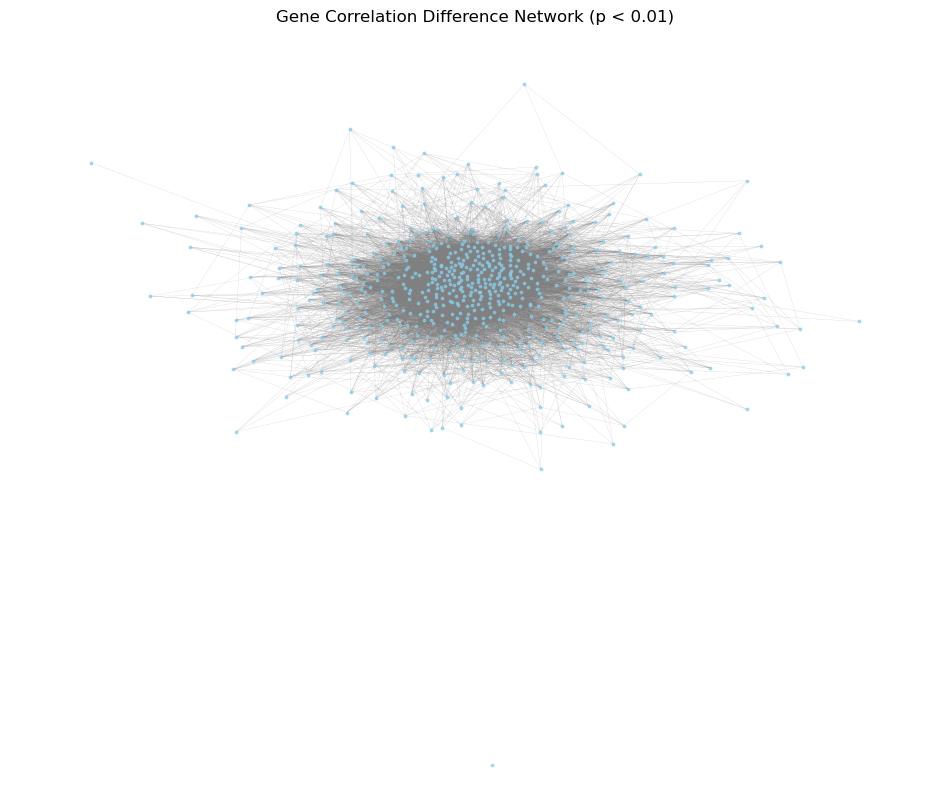

In [53]:
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.15, iterations=50)  # Force-directed layout
nx.draw_networkx(
    G,
    pos=pos,
    with_labels=False,
    node_size=3,
    node_color="skyblue",
    width=0.1,
    edge_color="gray",
    font_size=1,
    alpha=0.7,
)
plt.title("Gene Correlation Difference Network (p < 0.01)")
plt.axis("off")
plt.show()